Follow [HadlyBlog](https://rpubs.com/hadley/97970)

In [1]:
library(magrittr)
library(dplyr)
library(pmbq)
library(ggmap)
library(DT)
library(png)
library(lubridate)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in library(pmbq): there is no package called ‘pmbq’


Warning message:
: package ‘ggmap’ was built under R version 3.2.3Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.5
Attaching package: ‘ggmap’

The following object is masked from ‘package:magrittr’:

    inset



ERROR: Error in library(DT): there is no package called ‘DT’


Warning message:
: package ‘lubridate’ was built under R version 3.2.3
Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
UsedCarTrain<-read.csv("trainadjust.csv")

In [7]:
glimpse(UsedCarTrain)

Observations: 5,500
Variables: 22


ERROR: Error in nchar(x): invalid multibyte string, element 3


In [22]:
#預設版面
bestfit <- geom_smooth(
  method = "lm", 
  se = FALSE, 
  colour = alpha("steelblue", 0.5), 
  size = 2
)

In [19]:
? geom_smooth

geom_smooth              package:ggplot2               R Documentation

_S_m_o_o_t_h_e_d _c_o_n_d_i_t_i_o_n_a_l _m_e_a_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     Aids the eye in seeing patterns in the presence of overplotting.
     ‘geom_smooth’ and ‘stat_smooth’ are effectively aliases: they both
     use the same arguments. Use ‘geom_smooth’ unless you want to
     display the results with a non-standard geom.

_U_s_a_g_e:

     geom_smooth(mapping = NULL, data = NULL, stat = "smooth",
       position = "identity", ..., method = "auto", formula = y ~ x,
       se = TRUE, na.rm = FALSE, show.legend = NA, inherit.aes = TRUE)
     
     stat_smooth(mapping = NULL, data = NULL, geom = "smooth",
       position = "identity", ..., method = "auto", formula = y ~ x,
       se = TRUE, n = 80, span = 0.75, fullrange = FALSE, level = 0.95,
       method.args = list(), na.rm = FALSE, show.legend = NA,
       inherit.aes = TRUE)
     
_A_r_g_u_m_e_n_t_s:

 mapping: Set of aesthetic mappings created by ‘aes’ or ‘aes_’. If
          specified and ‘inherit.aes = TRUE’ (the default), it is
          combined with the default mapping at the top level of the
          plot. You must supply ‘mapping’ if there is no plot mapping.

    data: The data to be displayed in this layer. There are three
          options:

          If ‘NULL’, the default, the data is inherited from the plot
          data as specified in the call to ‘ggplot’.

          A ‘data.frame’, or other object, will override the plot data.
          All objects will be fortified to produce a data frame. See
          ‘fortify’ for which variables will be created.

          A ‘function’ will be called with a single argument, the plot
          data. The return value must be a ‘data.frame.’, and will be
          used as the layer data.

position: Position adjustment, either as a string, or the result of a
          call to a position adjustment function.

     ...: other arguments passed on to ‘layer’. These are often
          aesthetics, used to set an aesthetic to a fixed value, like
          ‘color = "red"’ or ‘size = 3’. They may also be parameters to
          the paired geom/stat.

  method: smoothing method (function) to use, eg. "lm", "glm", "gam",
          "loess", "rlm".

          For ‘method = "auto"’ the smoothing method is chosen based on
          the size of the largest group (across all panels). ‘loess’ is
          used for than 1,000 observations; otherwise ‘gam’ is used
          with ‘formula = y ~ s(x, bs = "cs")’. Somewhat anecdotally,
          ‘loess’ gives a better appearance, but is O(n^2) in memory,
          so does not work for larger datasets.

 formula: formula to use in smoothing function, eg. ‘y ~ x’, ‘y ~
          poly(x, 2)’, ‘y ~ log(x)’

      se: display confidence interval around smooth? (TRUE by default,
          see level to control

   na.rm: If ‘FALSE’, the default, missing values are removed with a
          warning. If ‘TRUE’, missing values are silently removed.

show.legend: logical. Should this layer be included in the legends?
          ‘NA’, the default, includes if any aesthetics are mapped.
          ‘FALSE’ never includes, and ‘TRUE’ always includes.

inherit.aes: If ‘FALSE’, overrides the default aesthetics, rather than
          combining with them. This is most useful for helper functions
          that define both data and aesthetics and shouldn't inherit
          behaviour from the default plot specification, e.g.
          ‘borders’.

geom, stat: Use to override the default connection between
          ‘geom_smooth’ and ‘stat_smooth’.

       n: number of points to evaluate smoother at

    span: Controls the amount of smoothing for the default loess
          smoother. Smaller numbers produce wigglier lines, larger
          numbers produce smoother lines.

fullrange: should the fit span the full range of the plot, or just the
          data

   level: level of confidence

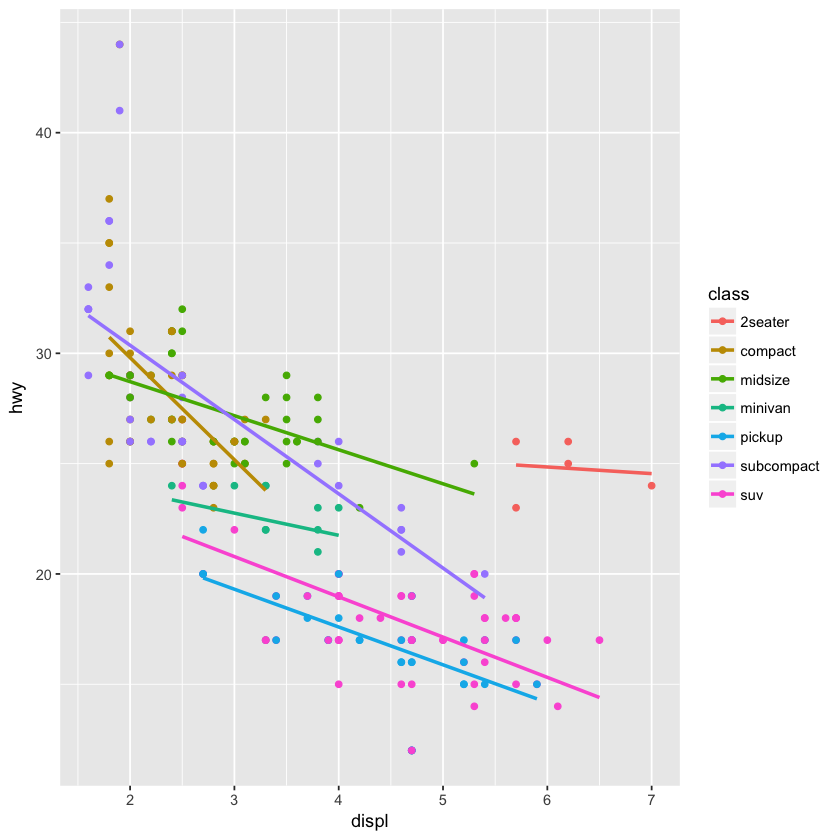

In [31]:
ggplot(mpg, aes(displ, hwy, colour = class)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

Warning message:
: Removed 505 rows containing non-finite values (stat_smooth).Warning message:
: Removed 505 rows containing missing values (geom_point).

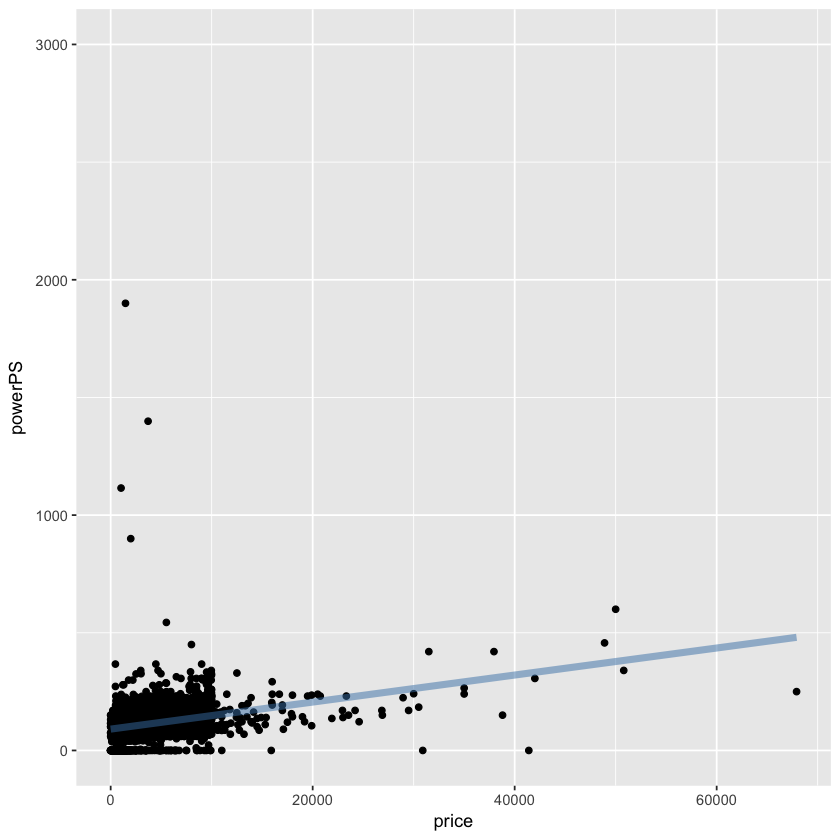

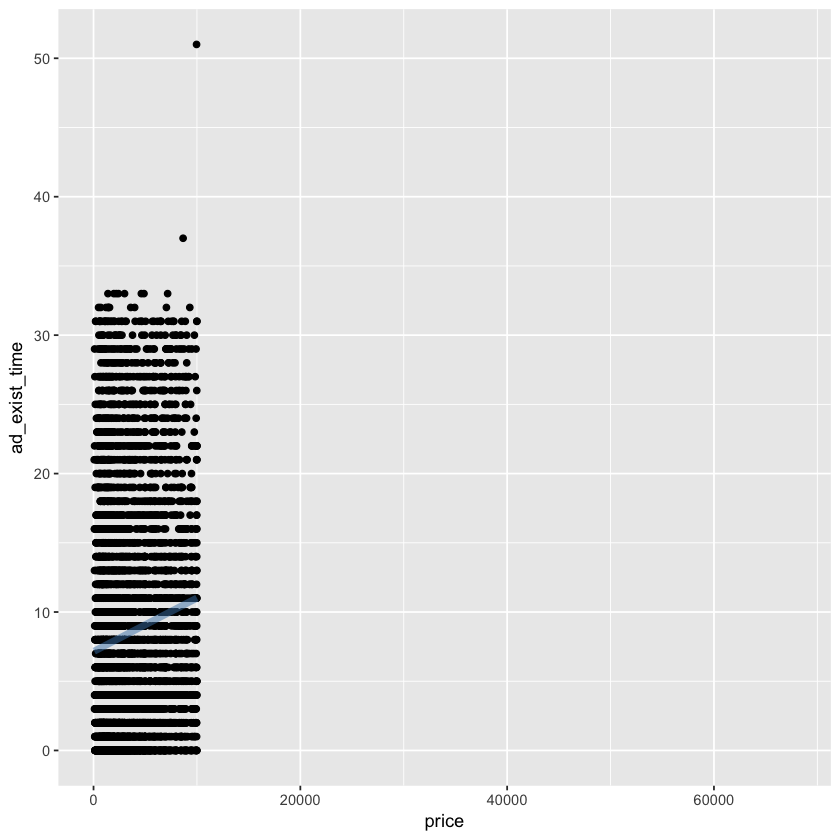

In [32]:
ggplot(UsedCarTrain,aes(price,powerPS), colour = abtest)+
        #Coord_cartesian 調整版面大小
        coord_cartesian(ylim = c(0,3000))+
        geom_point() +
        geom_smooth(method = "lm", se = FALSE)
ggplot(UsedCarTrain,aes(price, ad_exist_time)) + 
  geom_point() + 
  bestfit

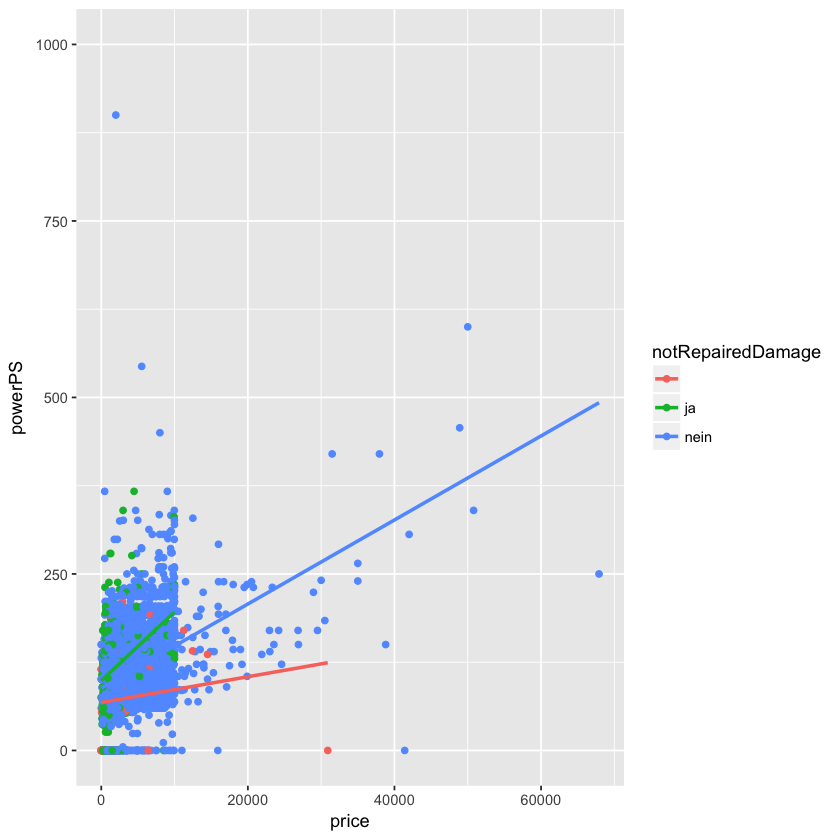

In [43]:
ggplot(UsedCarTrain,aes(price,powerPS, colour = notRepairedDamage ))+
        #Coord_cartesian 調整版面大小
        coord_cartesian(ylim = c(0,1000))+
        geom_point() +
        geom_smooth(method = "lm", se = FALSE)
#?colour 對應到8個參數,如何一次產生八張表

Kilometer版面很奇怪，把該參數抓出來看

In [13]:
summary(UsedCarTrain$kilometer)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5000  125000  150000  131100  150000  150000 

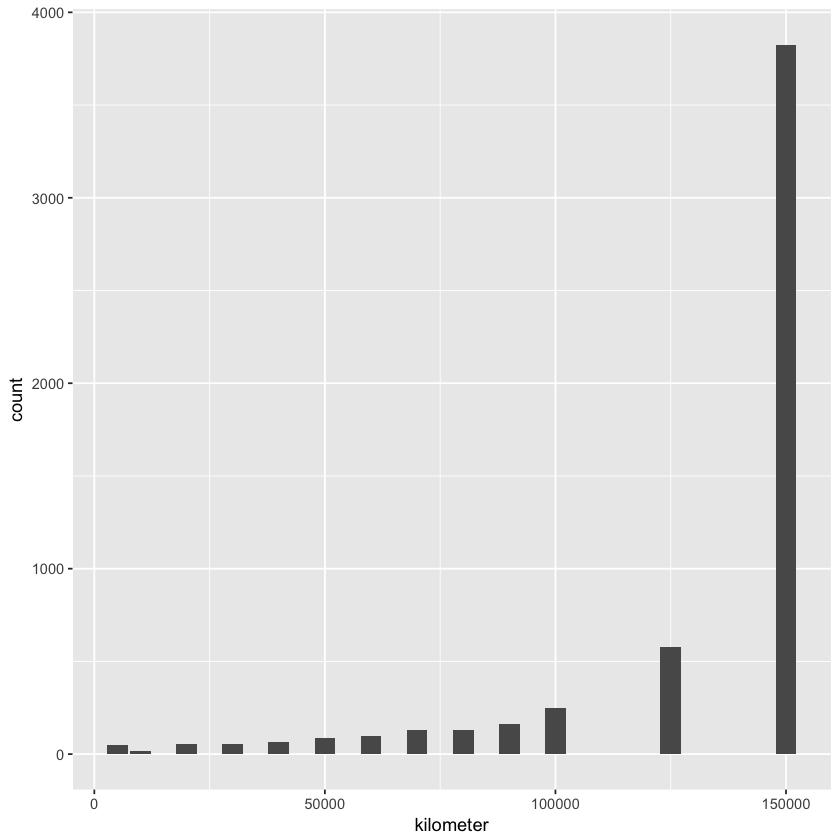

In [17]:
k<-ggplot(UsedCarTrain,aes(kilometer))
k+geom_bar()

?? 如何在bar上呈現該kilometer為多少?
